In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        myfile = os.path.join(dirname, filename)
        



In [2]:
df = pd.read_csv(myfile)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Lets clean and reformat the year column

In [4]:
# Get rid of rows that do not contain year

index_to_drop = df[df['Released_Year']=='PG'].index # First get the index of 'PG' vlaue 
 
df = df.drop(index_to_drop) # Drop function can be given index

# Convert the datatype of year to int

df['Released_Year'] = df['Released_Year'].astype(int)

## What is the highest grossing movie?

In [5]:
df_clean = df.dropna(subset=['Gross']) # remove NA

df_clean.loc[:,'Gross'] = df_clean['Gross'].str.replace(',','') # remove commas

df_clean.loc[:,'Gross'] = df_clean['Gross'].astype(int) # convert to int

df_clean[df_clean['Gross'] == df_clean['Gross'].max()] # Get the max grossing film

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225


Max grossing film of all time is Star Wars Ep 7

# What are the top 10 highest-rated movies?


In [6]:
top_movies = df.sort_values(by='IMDB_Rating', ascending = False).head(10)['Series_Title']

top_movies

0                              The Shawshank Redemption
1                                         The Godfather
2                                       The Dark Knight
3                                The Godfather: Part II
4                                          12 Angry Men
5         The Lord of the Rings: The Return of the King
6                                          Pulp Fiction
7                                      Schindler's List
10    The Lord of the Rings: The Fellowship of the Ring
11                                         Forrest Gump
Name: Series_Title, dtype: object

## What are the bottom 10 lowest-rated movies?

In [7]:
bottom_movies = df.sort_values(by='IMDB_Rating', ascending = False).tail(10)['Series_Title']

bottom_movies

917          Seven Pounds
916           The Visitor
915        The Blind Side
914       Sherlock Holmes
913             Die Welle
912            Zombieland
911    La piel que habito
910             Moneyball
909             Celda 211
999          The 39 Steps
Name: Series_Title, dtype: object

## Which actors have appeared in the most movies?

In [8]:
# Get star names from 4 columns
df_subset = df[['Star1','Star2','Star3','Star4']]

# Use the melt function to collapse values into a long table and apply count
df_subset.melt().value_counts().head(5) # actors who appeared in most movies

variable  value          
Star1     Tom Hanks          11
          Robert De Niro     11
          Clint Eastwood     10
          Al Pacino          10
          Humphrey Bogart     9
Name: count, dtype: int64

## Which directors have the highest average movie rating?

In [9]:
# Directors with top 5 highest ratings
top_directors_ratings = df.sort_values(by='IMDB_Rating', ascending= False).head()[['Director','IMDB_Rating']]
top_directors_ratings

# Notice how FFCoppola features twice in this list of top directors

,Director,IMDB_Rating
0,Frank Darabont,9.3
1,Francis Ford Coppola,9.2
2,Christopher Nolan,9.0
3,Francis Ford Coppola,9.0
4,Sidney Lumet,9.0


## How has the average movie rating changed over the years?


First lets check how many data points we have for 'released_year'.

In [10]:
df['Released_Year'].value_counts()

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1930     1
1921     1
1936     1
1922     1
1943     1
Name: count, Length: 99, dtype: int64

In [11]:
newseries = df.groupby(by='Released_Year')['IMDB_Rating'].mean() # Groupby and get mean ratings
rating = pd.DataFrame(newseries) # convert to a df
rating # notice how released_year is an index in the df
rating_year =rating.reset_index() # this will convert index to a column
rating_year

,Released_Year,IMDB_Rating
0,1920,8.100000
1,1921,8.300000
2,1922,7.900000
3,1924,8.200000
4,1925,8.100000
...,...,...
94,2016,7.935714
95,2017,7.890909
96,2018,7.994737
97,2019,7.995652


<Axes: title={'center': 'Movie Ratings by Year'}, xlabel='Released_Year'>

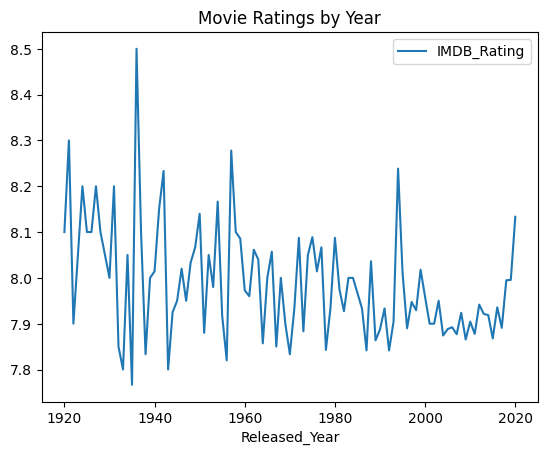

In [12]:
rating_year.plot(x='Released_Year', y='IMDB_Rating', kind='line', title='Movie Ratings by Year')

Ratings seem to have a downward trend.

## What is the trend in the number of movies released per year?


In [13]:
count = df['Released_Year'].value_counts() # get count of movies released per year
count_df  = pd.DataFrame(count) # convert to a df
count_year = count_df.reset_index() # convert into column
count_year

,Released_Year,count
0,2014,32
1,2004,31
2,2009,29
3,2013,28
4,2016,28
...,...,...
94,1930,1
95,1921,1
96,1936,1
97,1922,1


In [14]:
count_year=count_year.sort_values(by='Released_Year')

<Axes: title={'center': 'Number of movie releases by Year'}, xlabel='Released_Year'>

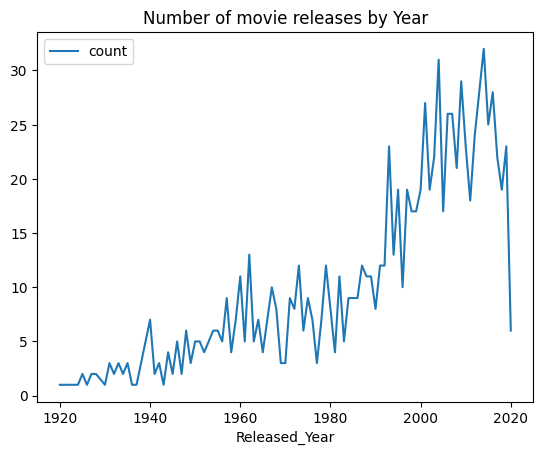

In [15]:
count_year.plot(x='Released_Year', y='count', title='Number of movie releases by Year')

There is a clear increase in the number of movies released per year

## Are certain genres becoming more or less popular over time?

Lets test this over a period of 5 year intervals. 

First we need to expand the genre into all its components. The table will get longer. This is done with the str.split and explode functions.

In [16]:
genre_df = df[['Released_Year','Genre']]

# Split strings and remove leading and trailing whitespaces
genre_df.loc[:, 'Genre'] = genre_df['Genre'].str.split(',').apply(lambda x:[s.strip() for s in x])

# Explode the list of genres into separate rows
genre_df_expanded = genre_df.explode('Genre').sort_values(by='Released_Year').reset_index(drop=True)

In [17]:
# To calculate interval from released_year, this trick is being used. Released_year is being divided
# by 5 (we want 5 year intervals) and the integer is being multiplied by 5. For eg, for 1920, 1920//5 = 384,
# 384*5 = 1920. 
genre_df_expanded['Interval'] = (genre_df_expanded['Released_Year'] // 5) * 5

print(genre_df_expanded)

      Released_Year      Genre  Interval
0              1920    Fantasy      1920
1              1920     Horror      1920
2              1920    Mystery      1920
3              1921     Family      1920
4              1921     Comedy      1920
...             ...        ...       ...
2533           2020      Drama      2020
2534           2020     Comedy      2020
2535           2020   Thriller      2020
2536           2020    History      2020
2537           2020  Biography      2020

[2538 rows x 3 columns]


In [18]:
genre_count = genre_df_expanded.groupby(by='Interval')['Genre'].value_counts()

genre_count_df = pd.DataFrame(genre_count)

genre_count_df = genre_count_df.reset_index()

genre_count_df

,Interval,Genre,count
0,1920,Comedy,2
1,1920,Fantasy,2
2,1920,Horror,2
3,1920,Action,1
4,1920,Drama,1
...,...,...,...
317,2020,Adventure,1
318,2020,Animation,1
319,2020,Biography,1
320,2020,Romance,1


Its difficult to see the contents of the df in this notebook. I will download it and examine it.

In [19]:
genre_count_df.to_csv("genre_count.csv")


In [20]:
genre_count_df['Genre'].value_counts()

Genre
Comedy       21
Drama        21
Romance      20
Adventure    20
Thriller     20
Action       19
Mystery      19
Crime        18
War          17
Fantasy      17
Family       16
History      16
Sci-Fi       16
Biography    14
Music        13
Animation    13
Horror       12
Western      10
Musical       8
Sport         8
Film-Noir     4
Name: count, dtype: int64

Some interesting insights are found in the data. For instance, action movies have become more popular. 

<Axes: title={'center': 'Rise in action movies'}, xlabel='Interval'>

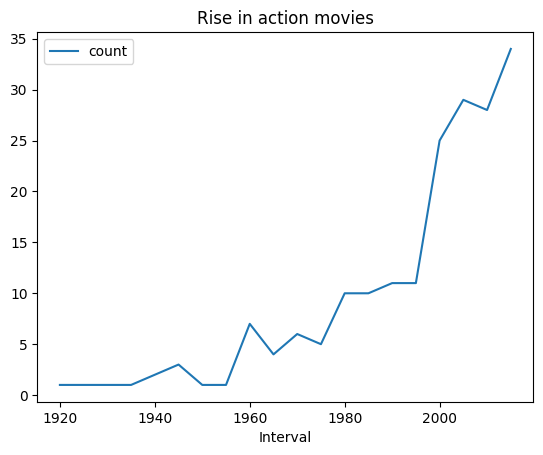

In [21]:
action_movies = genre_count_df[genre_count_df['Genre' ] == "Action"]

action_movies.plot(x='Interval', y='count', title='Rise in action movies')



The results indicate that there has been a rise in action movies. These are absolute numbers though and do not take into account the increase in movie data over the years. 